In [240]:
import numpy as np
import pandas as pd
import matplotlib as mb
import seaborn as sns
import scipy.stats 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [241]:
LData_url='/Users/srinivasaadvaith/Desktop/FINAL CODES/CODES/DATA_1.csv'
LData=pd.read_csv(LData_url)
LData.drop(['Unnamed: 0'],inplace=True,axis=1)

In [242]:
LData.head()

,Mean,Maximum_value,Minimum_value,Range,Standard Deviation,Variance,Absolute_mean,Absolute_MAX,RMS,Crest Factor,Shape factor,Impulse Factor,Kurtosis,Skewness,Clearance Factor,FAULT TYPE,Label,Label_no
0,0.021097,1.548135,-1.476162,3.024297,0.298938,0.089364,0.203990,1.548135,0.299681,5.165940,1.469099,7.589278,4.553056,-0.097854,9.597586,INNER RACE FAULT OF 0.007 INCH,IR_7_1,0
1,0.021229,1.362467,-1.394594,2.757061,0.277990,0.077279,0.192230,1.394594,0.278800,5.002138,1.450347,7.254836,4.696206,-0.014078,9.109635,INNER RACE FAULT OF 0.007 INCH,IR_7_1,0
2,0.020257,1.572543,-1.220400,2.792943,0.295425,0.087276,0.202346,1.572543,0.296119,5.310510,1.463429,7.771555,3.735528,-0.073138,9.953077,INNER RACE FAULT OF 0.007 INCH,IR_7_1,0
3,0.020035,1.432770,-1.398975,2.831745,0.268501,0.072093,0.181403,1.432770,0.269247,5.321394,1.484250,7.898281,5.582666,0.058976,10.071042,INNER RACE FAULT OF 0.007 INCH,IR_7_1,0
4,0.019870,1.271302,-1.161362,2.432664,0.286134,0.081873,0.196291,1.271302,0.286824,4.432349,1.461213,6.476605,3.587559,-0.067984,8.281395,INNER RACE FAULT OF 0.007 INCH,IR_7_1,0


In [243]:
Data_modified=LData
del Data_modified['Label']
del Data_modified['FAULT TYPE']
Data_modified

,Mean,Maximum_value,Minimum_value,Range,Standard Deviation,Variance,Absolute_mean,Absolute_MAX,RMS,Crest Factor,Shape factor,Impulse Factor,Kurtosis,Skewness,Clearance Factor,Label_no
0,0.021097,1.548135,-1.476162,3.024297,0.298938,0.089364,0.203990,1.548135,0.299681,5.165940,1.469099,7.589278,4.553056,-0.097854,9.597586,0
1,0.021229,1.362467,-1.394594,2.757061,0.277990,0.077279,0.192230,1.394594,0.278800,5.002138,1.450347,7.254836,4.696206,-0.014078,9.109635,0
2,0.020257,1.572543,-1.220400,2.792943,0.295425,0.087276,0.202346,1.572543,0.296119,5.310510,1.463429,7.771555,3.735528,-0.073138,9.953077,0
3,0.020035,1.432770,-1.398975,2.831745,0.268501,0.072093,0.181403,1.432770,0.269247,5.321394,1.484250,7.898281,5.582666,0.058976,10.071042,0
4,0.019870,1.271302,-1.161362,2.432664,0.286134,0.081873,0.196291,1.271302,0.286824,4.432349,1.461213,6.476605,3.587559,-0.067984,8.281395,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,0.016535,0.166684,-0.167518,0.334202,0.059701,0.003564,0.050273,0.167518,0.061948,2.704159,1.232241,3.332175,-0.173194,-0.221345,3.904493,9
2914,0.017510,0.188588,-0.197559,0.386147,0.063149,0.003988,0.053922,0.197559,0.065532,3.014705,1.215309,3.663797,-0.351542,-0.220355,4.252686,9
2915,0.016256,0.317513,-0.345884,0.663397,0.074575,0.005561,0.060085,0.345884,0.076326,4.531677,1.270296,5.756570,0.970344,-0.270964,6.828517,9
2916,0.015766,0.196307,-0.192761,0.389068,0.066686,0.004447,0.056439,0.196307,0.068524,2.864789,1.214125,3.478213,-0.334677,-0.280929,4.021315,9


In [244]:
scaler=StandardScaler()

In [245]:
scaler.fit(Data_modified.drop('Label_no',axis=1))

StandardScaler()

In [246]:
scaled_features=scaler.transform(Data_modified.drop('Label_no',axis=1))
scaled_features

array([[ 0.82485837,  0.02405314,  0.00533412, ...,  0.54760218,
        -0.30198491,  0.45975117],
       [ 0.84504647, -0.09696641,  0.05779303, ...,  0.58413499,
         0.14424413,  0.34563565],
       [ 0.69654245,  0.03996246,  0.16982165, ...,  0.33896318,
        -0.1703385 ,  0.54288861],
       ...,
       [ 0.08568302, -0.77807535,  0.73224556, ..., -0.36673163,
        -1.22405119, -0.18784183],
       [ 0.01074414, -0.85707801,  0.83072342, ..., -0.69978231,
        -1.27713417, -0.84435292],
       [ 0.10705805, -0.8665964 ,  0.83609006, ..., -0.6579801 ,
        -0.68177905, -0.85512639]])

In [247]:
Data_modified.columns

Index(['Mean', 'Maximum_value', 'Minimum_value', 'Range', 'Standard Deviation',
       'Variance', 'Absolute_mean', 'Absolute_MAX', 'RMS', 'Crest Factor',
       'Shape factor', 'Impulse Factor', 'Kurtosis', 'Skewness',
       'Clearance Factor', 'Label_no'],
      dtype='object')

In [248]:
scaled_df=pd.DataFrame(scaled_features,columns=Data_modified.columns[:-1])
scaled_df.head()

,Mean,Maximum_value,Minimum_value,Range,Standard Deviation,Variance,Absolute_mean,Absolute_MAX,RMS,Crest Factor,Shape factor,Impulse Factor,Kurtosis,Skewness,Clearance Factor
0,0.824858,0.024053,0.005334,0.009280,-0.136812,-0.349796,-0.153395,-0.006532,-0.137100,0.922589,0.409602,0.634400,0.547602,-0.301985,0.459751
1,0.845046,-0.096966,0.057793,-0.077404,-0.204967,-0.384625,-0.214667,-0.103764,-0.205127,0.775526,0.317626,0.506575,0.584135,0.144244,0.345636
2,0.696542,0.039962,0.169822,-0.065765,-0.148240,-0.355812,-0.161959,0.008924,-0.148705,1.052384,0.381791,0.704067,0.338963,-0.170338,0.542889
3,0.662617,-0.051142,0.054976,-0.053178,-0.235841,-0.399571,-0.271077,-0.079588,-0.236247,1.062156,0.483917,0.752502,0.810366,0.533366,0.570477
4,0.637491,-0.156388,0.207791,-0.182628,-0.178468,-0.371384,-0.193504,-0.181840,-0.178987,0.263968,0.370920,0.209134,0.301200,-0.142885,0.151938


In [249]:
X=scaled_df
Y=Data_modified['Label_no']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=750,stratify = Data_modified['Label_no'], random_state=132)


In [250]:
knn=KNeighborsClassifier(n_neighbors=1)

In [251]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [252]:
predictions=knn.predict(X_test)

In [253]:
 from sklearn.metrics import confusion_matrix,classification_report

In [254]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        75
           1       1.00      1.00      1.00        75
           2       0.96      1.00      0.98        75
           3       0.91      0.95      0.93        75
           4       0.88      0.77      0.82        75
           5       0.88      0.80      0.84        75
           6       1.00      1.00      1.00        75
           7       0.80      0.81      0.81        75
           8       0.96      0.96      0.96        75
           9       0.90      1.00      0.95        75

    accuracy                           0.93       750
   macro avg       0.93      0.93      0.93       750
weighted avg       0.93      0.93      0.93       750



<AxesSubplot:>

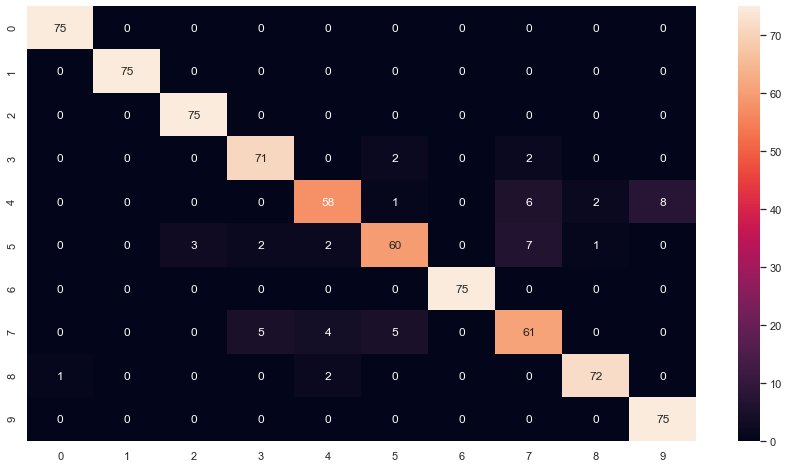

In [255]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(confusion_matrix(Y_test,predictions),annot=True)


In [256]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    predictions_i=knn.predict(X_test)
    error_rate.append(np.mean(predictions_i!=Y_test))

error_rate

[0.07066666666666667,
 0.06933333333333333,
 0.056,
 0.058666666666666666,
 0.05333333333333334,
 0.056,
 0.06,
 0.058666666666666666,
 0.05466666666666667,
 0.056,
 0.058666666666666666,
 0.056,
 0.05733333333333333,
 0.05466666666666667,
 0.06133333333333333,
 0.064,
 0.064,
 0.06533333333333333,
 0.064,
 0.064,
 0.06133333333333333,
 0.06133333333333333,
 0.06,
 0.064,
 0.06666666666666667,
 0.06533333333333333,
 0.068,
 0.06266666666666666,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06533333333333333,
 0.068,
 0.06933333333333333,
 0.06533333333333333,
 0.06933333333333333,
 0.06666666666666667,
 0.06933333333333333,
 0.06933333333333333]

<AxesSubplot:>

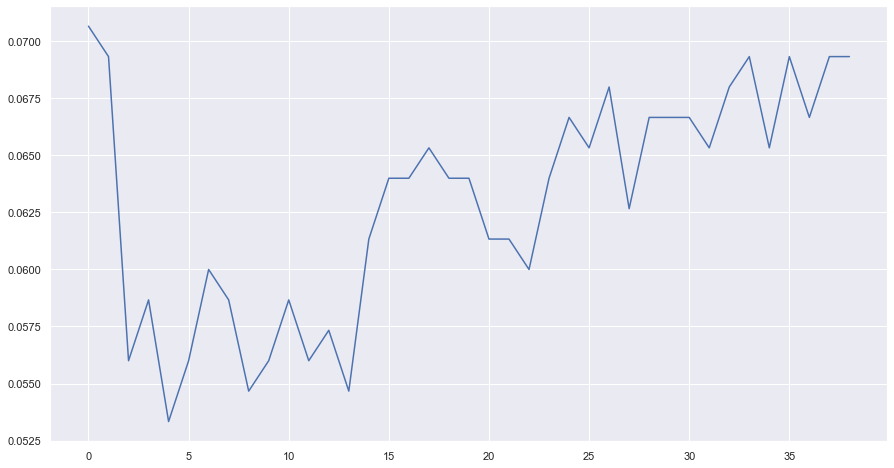

In [257]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(data=error_rate)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        75
           1       1.00      1.00      1.00        75
           2       0.95      1.00      0.97        75
           3       0.95      0.97      0.96        75
           4       0.87      0.88      0.87        75
           5       0.89      0.84      0.86        75
           6       1.00      0.99      0.99        75
           7       0.83      0.77      0.80        75
           8       1.00      0.99      0.99        75
           9       0.94      0.97      0.95        75

    accuracy                           0.94       750
   macro avg       0.94      0.94      0.94       750
weighted avg       0.94      0.94      0.94       750





<AxesSubplot:>

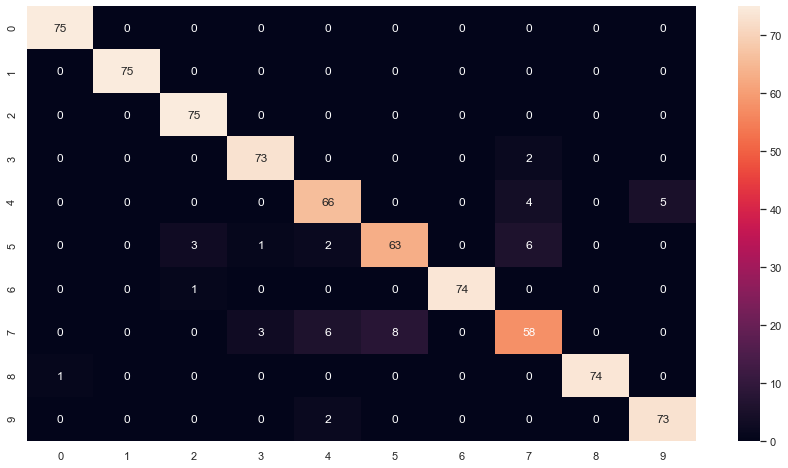

In [261]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,Y_train)
predictions=knn.predict(X_test)
print(classification_report(Y_test,predictions))
sns.set(rc = {'figure.figsize':(15,8)})
cfmatrix=confusion_matrix(Y_test,predictions)
print('\n')
sns.heatmap(cfmatrix,annot=True)